# IMC diabetes dataset, 1.8 Million cells

[View Publication](https://www.sciencedirect.com/science/article/pii/S1550413118306910)

This example shows some of the analysis and visualizations in SpatialTis. 

It should give you a general idea on how to use it.


In [1]:
%config InlineBackend.figure_format = 'retina'
import anndata as ad
import spatialtis as st
import spatialtis.plotting as sp
from spatialtis import Config

In [2]:
data = ad.read_h5ad("../data/IMC-diabetes.h5ad")
data.obs.head(5)

area  eccentricity  islet_id                                   centroid  \
0    12      0.837664         0                 (52.5, 0.6666666666666666)   
1    19      0.902864         0                 (128.0, 0.894736842105263)   
2     7      0.882300         0  (135.28571428571428, 0.42857142857142855)   
3    19      0.784367         0    (449.5263157894737, 1.1578947368421053)   
4    30      0.930895         0                   (458.3666666666666, 1.1)   

  image  case slide  part  group  stage  cell_cat cell_type  n_genes  
0   A01  6362     A  Tail      1  Onset  exocrine    acinar       30  
1   A01  6362     A  Tail      1  Onset  exocrine    acinar       36  
2   A01  6362     A  Tail      1  Onset  exocrine    acinar       30  
3   A01  6362     A  Tail      1  Onset  exocrine    acinar       33  
4   A01  6362     A  Tail      1  Onset  exocrine    acinar       38

In [3]:
data

AnnData object with n_obs × n_vars = 1776974 × 38
    obs: 'area', 'eccentricity', 'islet_id', 'centroid', 'image', 'case', 'slide', 'part', 'group', 'stage', 'cell_cat', 'cell_type', 'n_genes'
    var: 'markers', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

In [4]:
st.wkt_points(data, 'centroid')

In [5]:
Config.exp_obs = ['stage', 'part', 'case', 'image']
Config.centroid_key = 'centroid'
Config.cell_type_key = 'cell_type'
Config.marker_key = 'markers'
Config.progress_bar = False

Check the configuration to make sure things are correct

In [6]:
Config.view()

                      Current configurations of SpatialTis                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Options                 ┃ Attributes    ┃ Value                              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Multiprocessing         │ mp            │ True                               │
│ Verbose                 │ verbose       │ True                               │
│ Progress bar            │ progress_bar  │ False                              │
│ Auto save               │ auto_save     │ False                              │
│ Experiment observations │ exp_obs       │ ['stage', 'part', 'case', 'image'] │
│ ROI key                 │ roi_key       │ image                              │
│ Cell type key           │ cell_type_key │ cell_type                          │
│ Marker key              │ marker_key    │ markers                            │
│ Centroid key            │ centroid_key  │ centroid                           │
│ Shape key               │ shape_key     │                                    │
└─────────────────────────┴───────────────┴────────────────────────────────────┘

Save the config to the data

In [7]:
Config.dumps(data)

Let's look at what those ROI looks like

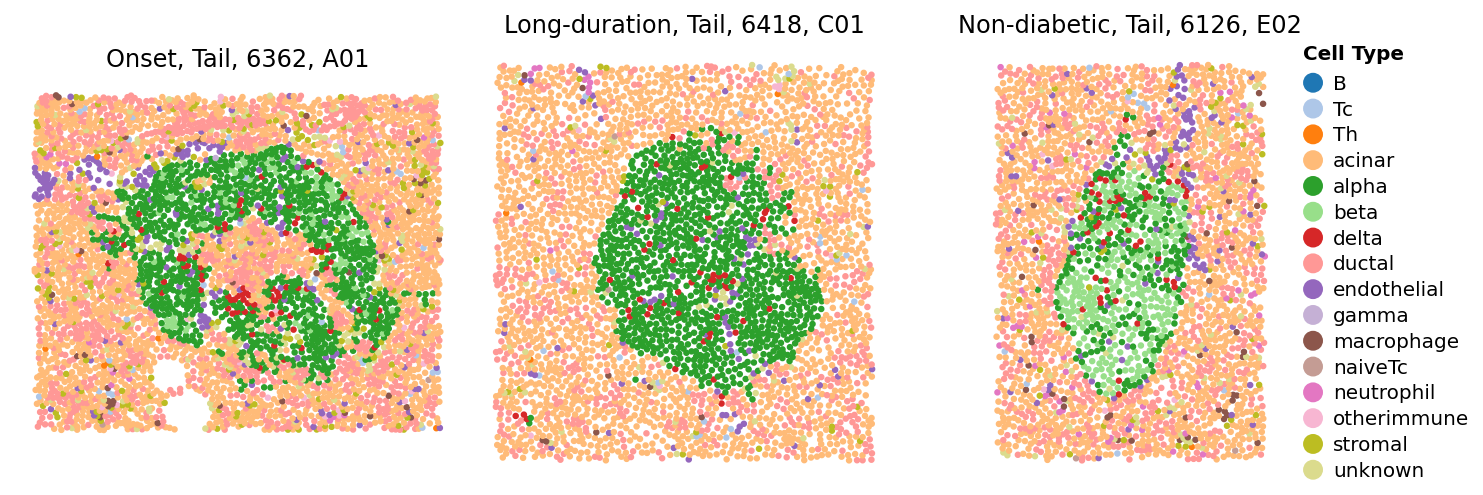

In [8]:
sp.cell_map(data, ['E02', 'A01', 'C01'])

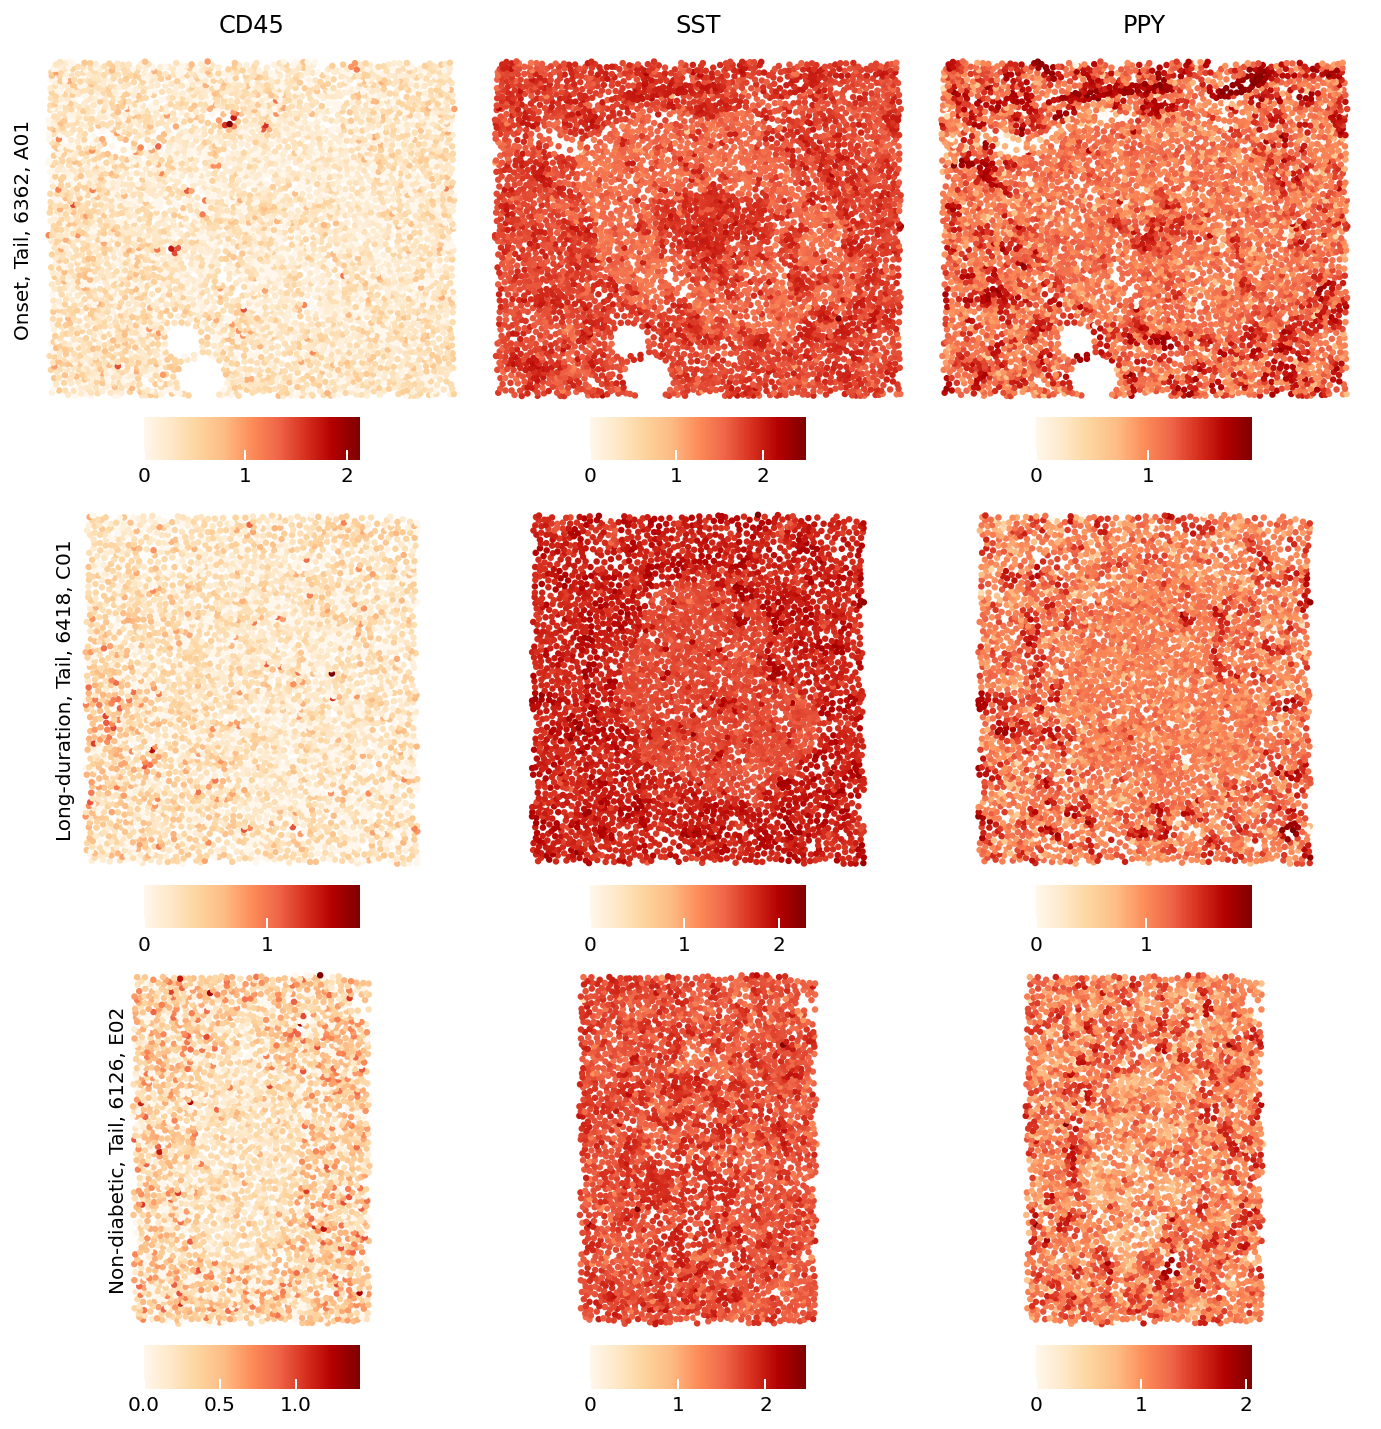

In [9]:
sp.expression_map(data, 
                  rois=['E02', 'A01', 'C01'], 
                  markers=['CD45', 'SST', 'PPY'])

In [10]:
st.cell_components(data)

⏳ Cell components

📦 Added to AnnData, uns: 'cell_components'

⏱ 3s510ms

<AxesSubplot:xlabel='stage', ylabel='Count'>

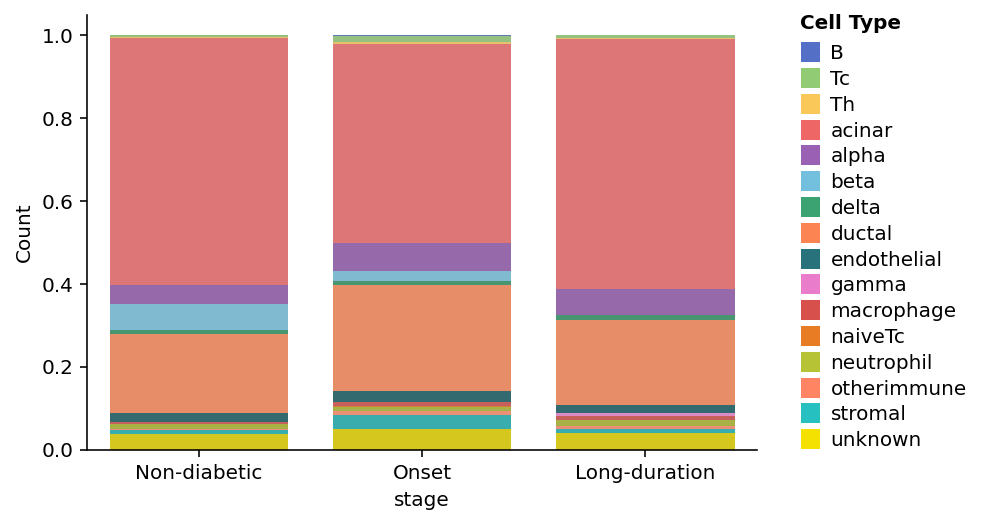

In [11]:
sp.cell_components(data,
                   groupby='stage',
                   percentage=True,
                   order=['Non-diabetic', 'Onset', 'Long-duration'])

In [12]:
st.cell_density(data)

⏳ Cell density

📦 Added to AnnData, uns: 'cell_density'

⏱ 9s413ms

<AxesSubplot:xlabel='Cell Type', ylabel='Density'>

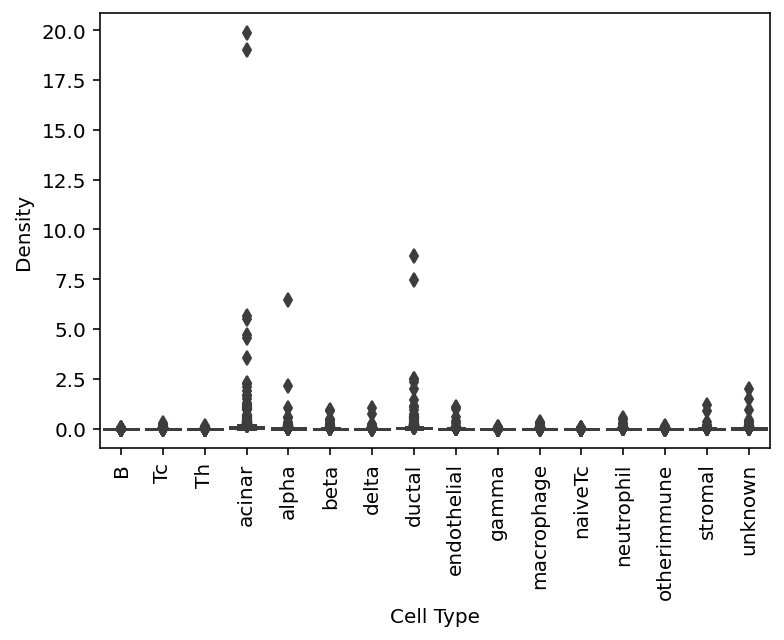

In [13]:
sp.cell_density(data)

In [14]:
st.cell_co_occurrence(data)

⏳ Cell co-occurrence

📦 Added to AnnData, uns: 'cell_co_occurrence'

⏱ 3s455ms

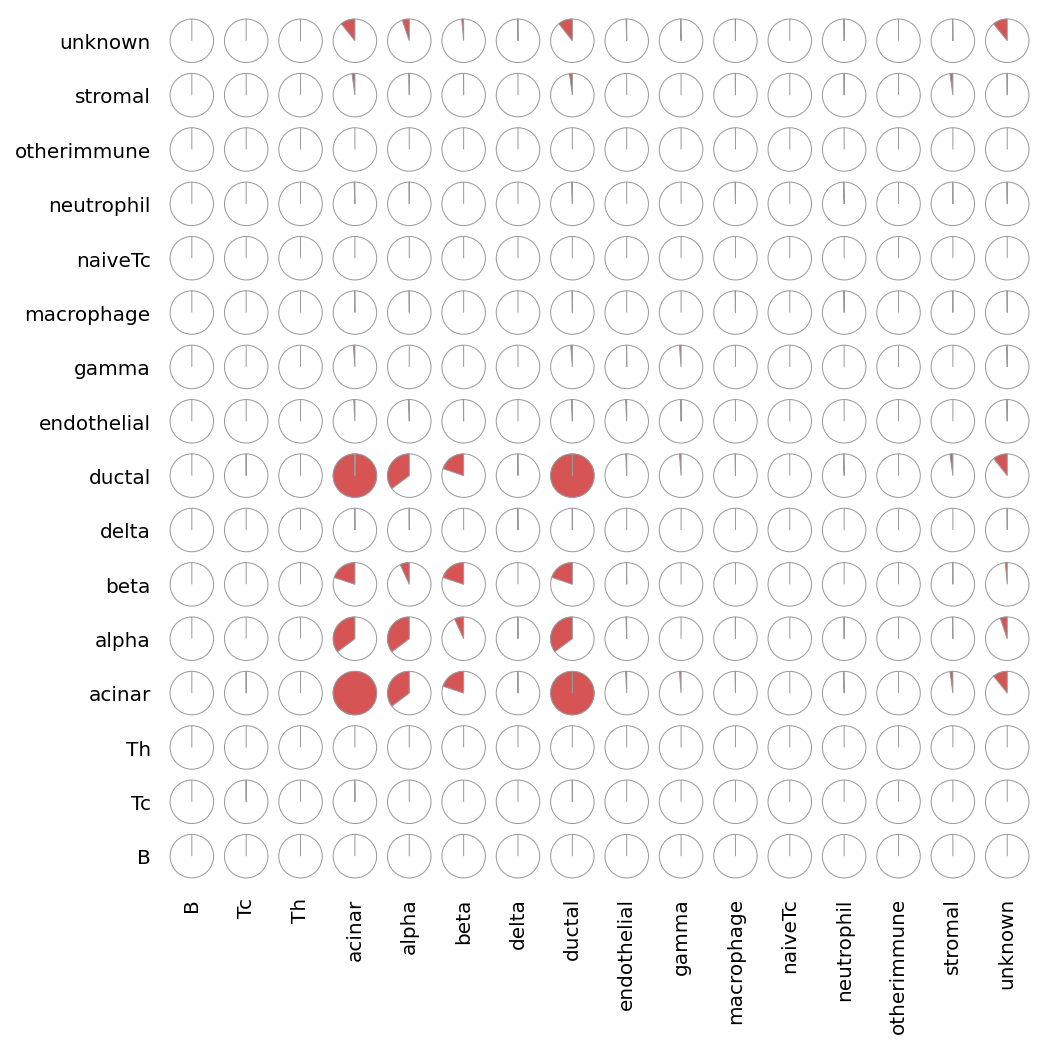

In [15]:
sp.cell_co_occurrence(data)

In [16]:
st.cell_dispersion(data)

⏳ Cell dispersion

🛠 Method: Index of dispersion

📦 Added to AnnData, uns: 'cell_dispersion'

⏱ 9s716ms

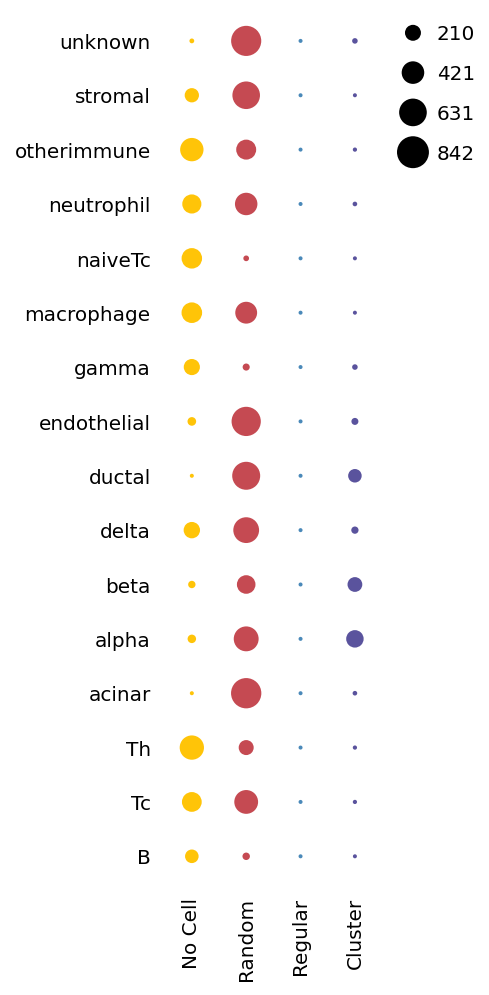

In [17]:
sp.cell_dispersion(data)

In [18]:
st.spatial_heterogeneity(data)

⏳ Spatial heterogeneity

🛠 Method: Leibovici entropy

📦 Added to AnnData, uns: 'heterogeneity'

⏱ 7s587ms

<AxesSubplot:xlabel='stage', ylabel='heterogeneity'>

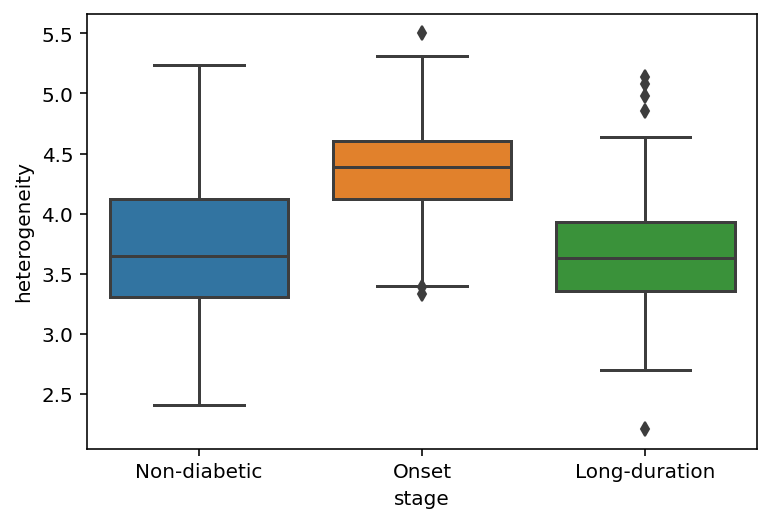

In [19]:
sp.spatial_heterogeneity(data, order=['Non-diabetic', 'Onset', 'Long-duration'])

One of the most essetial steps in analyzing spatial omics data is to embedding it into a spatial network.

In [20]:
st.find_neighbors(data, r=12)

⏳ Find neighbors

🛠 Method: kdtree

📦 Added to AnnData, obsm: 'cell_neighbors'

📦 Added to AnnData, obs: 'cell_neighbors_count'

⏱ 10s976ms

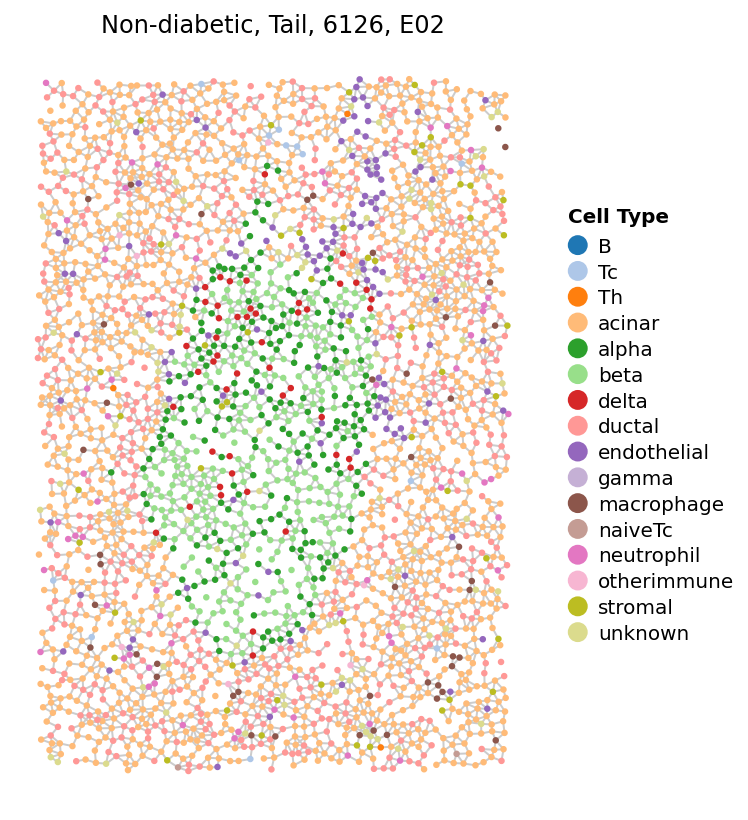

In [21]:
sp.cell_map(data, ['E02'], show_neighbors=True, figsize=(6, 7))

In [22]:
st.cell_interaction(data)

⏳ Cell interaction

🛠 Method: pseudo p-value

📦 Added to AnnData, uns: 'cell_interaction'

⏱ 1m56s

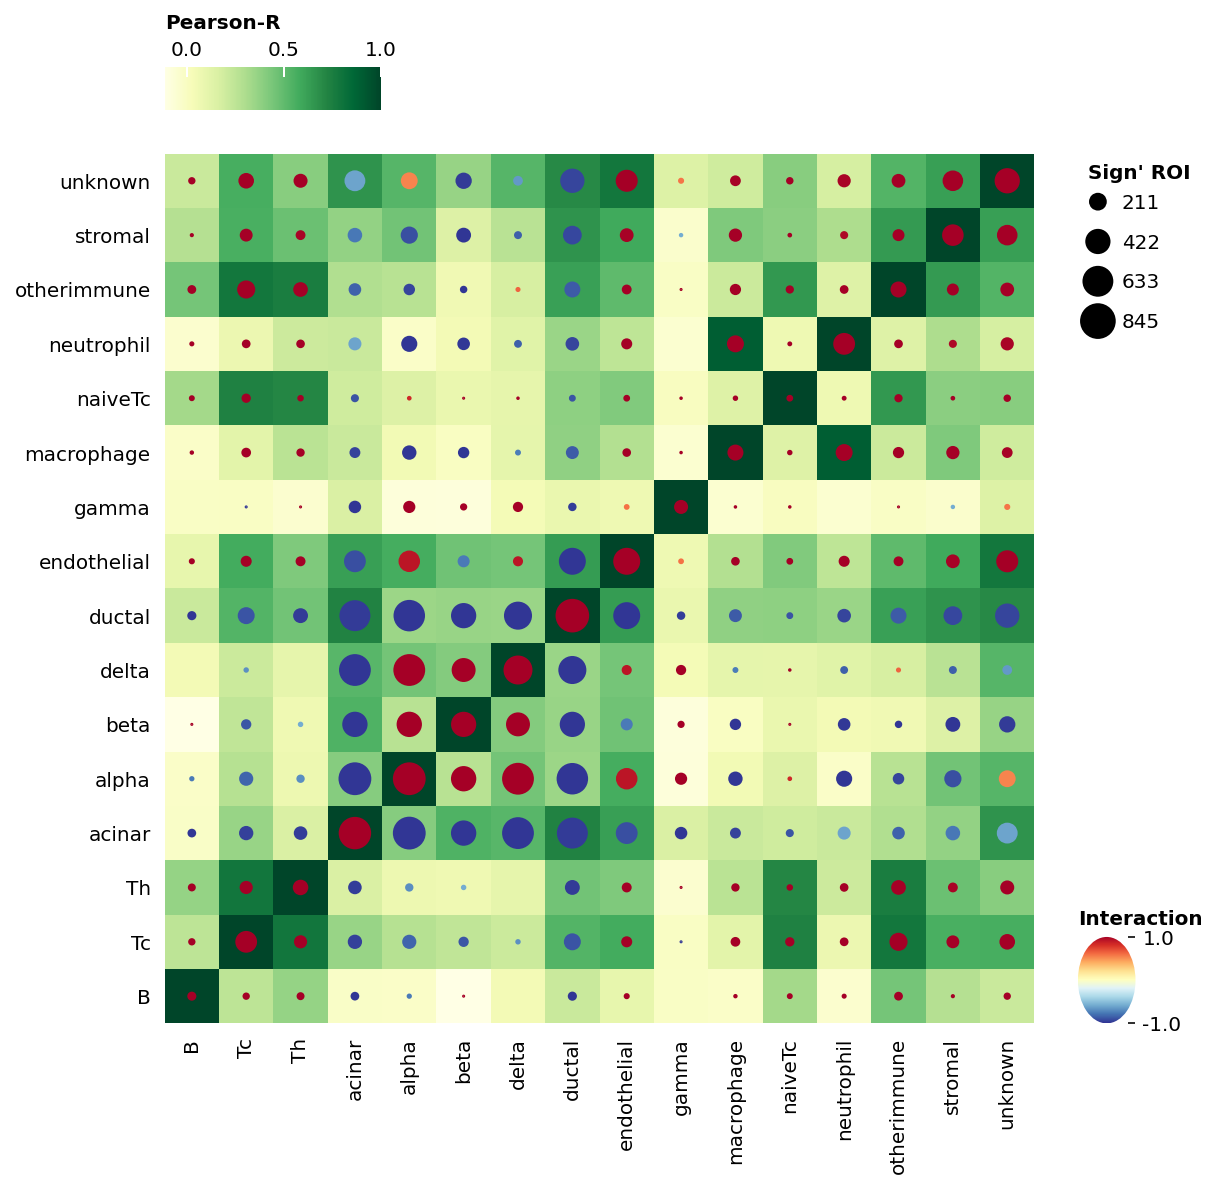

In [23]:
sp.cell_interaction(data)

Or you can visualiza it in heatmap

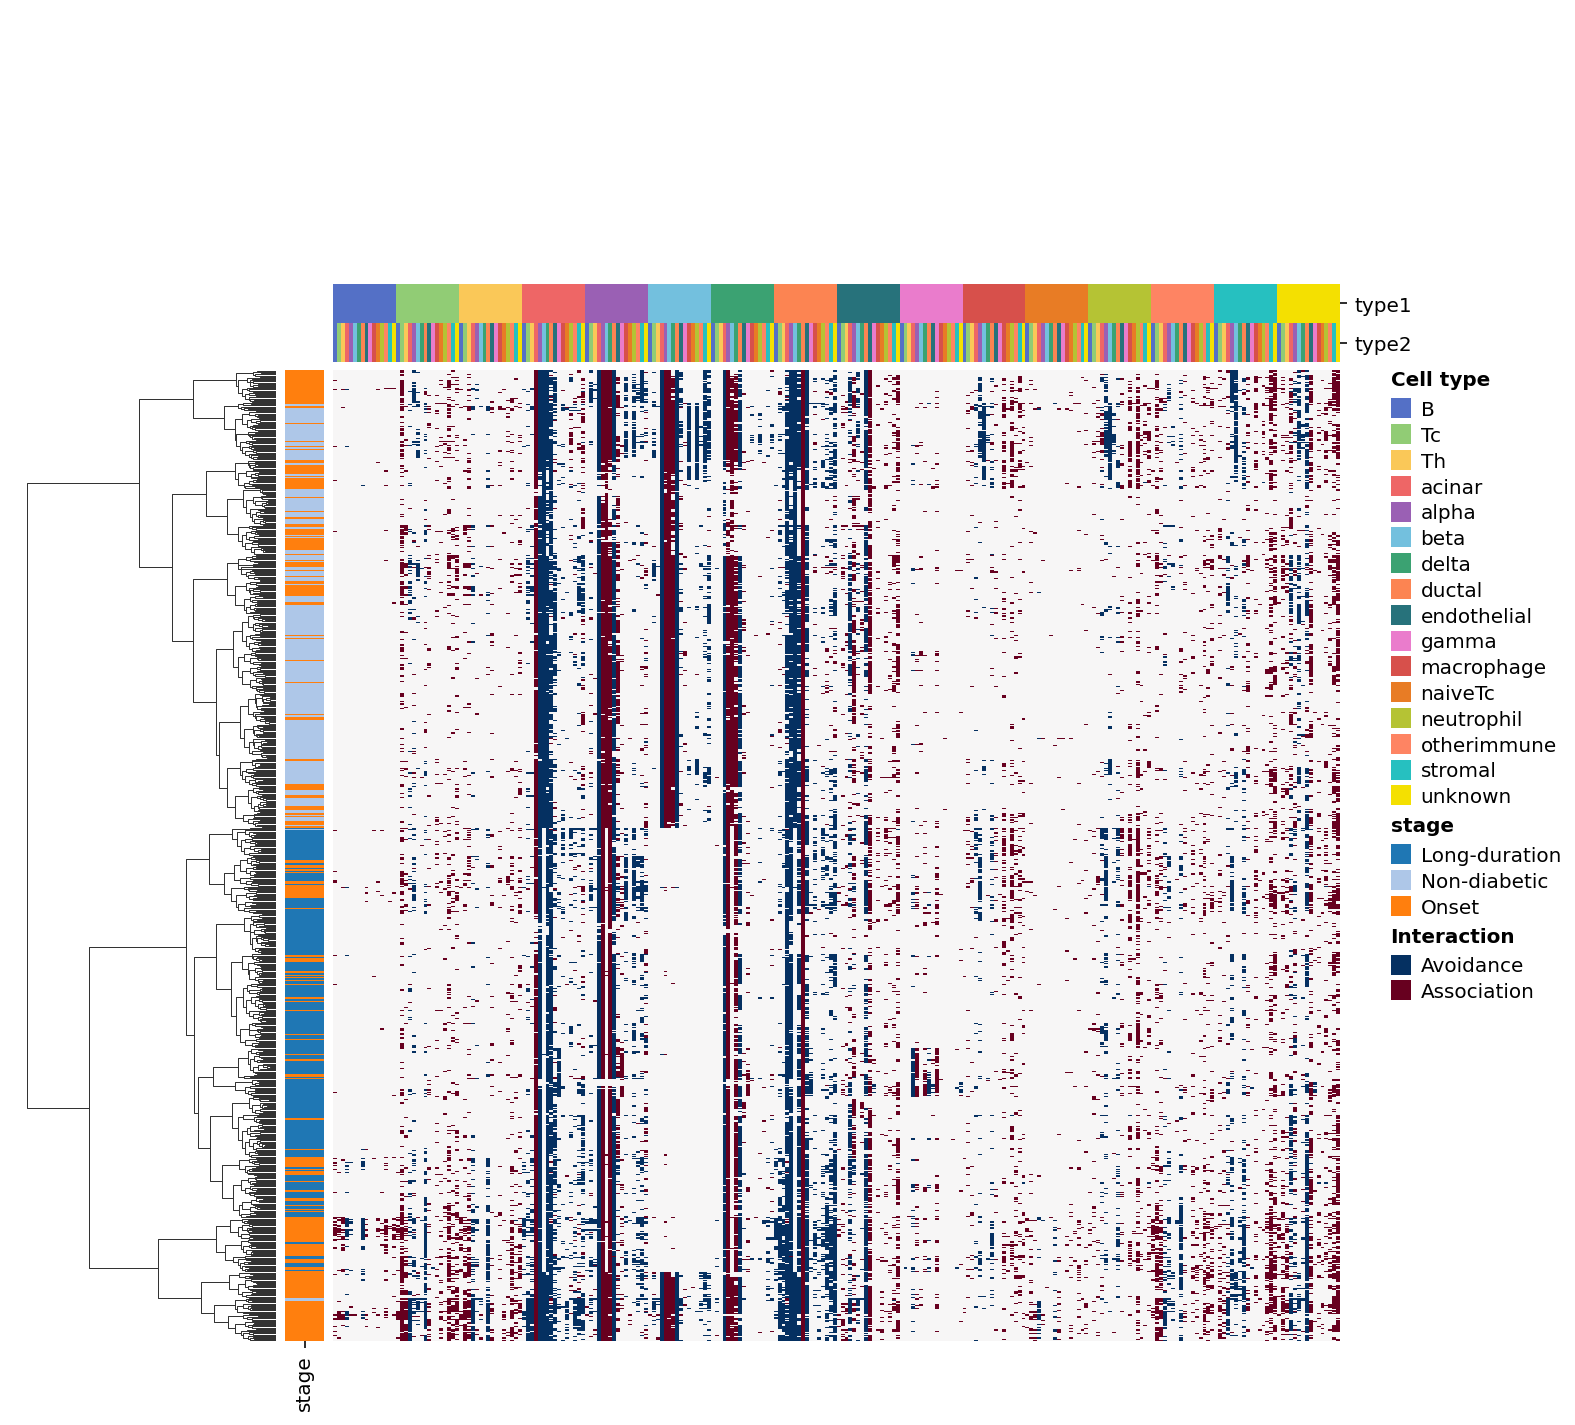

In [24]:
sp.cell_interaction(data, use="heatmap", groupby="stage")

In [25]:
st.NCD_marker(data)

⏳ NCD Markers

📦 Added to AnnData, uns: 'ncd_marker'

⏱ 3m18s

In [26]:
r = st.get_result(data, 'ncd_marker')
r.sort_values('log2_FC', ascending=False)

cell_type  marker neighbor_type  dependency   log2_FC           pval
39        delta     CDH         gamma    0.914396  2.484879  3.493616e-279
34         beta     CDH         gamma    0.860546  2.417639  5.402380e-112
81      unknown     CDH         gamma    0.730400  2.405135  1.074318e-214
56  endothelial     CDH         gamma    0.542463  2.367553   5.895981e-90
75      stromal     CDH         gamma    0.528550  2.337943   2.023402e-33
..          ...     ...           ...         ...       ...            ...
31        alpha  cPARP1          beta    0.675172 -0.061171   0.000000e+00
44        delta     SST          beta    0.705842 -0.067218   0.000000e+00
19        alpha     CA9          beta    0.673017 -0.109999   0.000000e+00
37        delta     CA9          beta    0.653708 -0.142080   0.000000e+00
46        delta  cCASP3          beta    0.516018 -0.164905  6.121436e-302

[87 rows x 6 columns]